## <span style="color:blue">  Numerical exercises 4</span>
### Exercise 04.1

In Statistical Mechanics the Maxwell–Boltzmann distribution (<a href="https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution" target="_blank">Link Wikipedia</a>) is a probability distribution used for describing particle speeds in idealized gases. However, rarefied gases at ordinary temperatures behave very nearly like an ideal gas and the Maxwell–Boltzmann speed distribution is an excellent approximation for such gases. For a 3D system its formula is:
$$p(v,T) = \left( \frac{m}{2\pi k_B T} \right)^{3/2} 4\pi v^2 e^{-\frac{m v^2}{2 k_B T}}$$

By using LJ reduced units (Length $\sigma$; Energy: $\epsilon$; Mass: the mass, $m$, of the particles; Temperature: $\epsilon/k_B$; velocity: $\sqrt{\epsilon/m}$) its form becomes:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

The NSL_SIMULATOR code already computes the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$.

<span style="color:red">Include the calculation of the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, inside your Molecular Dynamics code by using data blocking to obtain single block averages, progressive average values and progressive uncertainties for $p(v^*,T^*)$.</span>

Remember that, the Maxwell–Boltzmann distribution, $p(v^*,T^*)$, can be approximately computed as a **normalized histogram** on an appropriate interval $\left[ 0, v_{max}\right]$ and chosing the number of bins into which you want to divide this interval.

### Commenti sull'implementazione

Per misurare correttamente la distribuzione di Maxwell-Boltzmann, è stato necessario adottare un approccio fisicamente sensato nella costruzione dell'istogramma delle velocità.

Infatti, la forma della curva di Maxwell-Boltzmann, e in particolare la sua larghezza e la posizione del picco, dipende direttamente dalla temperatura del sistema. A basse temperature, le velocità delle particelle sono concentrate in un intervallo ristretto, mentre ad alte temperature si disperdono su un range molto più ampio. Poiché la larghezza caratteristica della distribuzione è proporzionale alla radice quadrata della temperatura ($\sqrt{T}$), si è scelto di legare l'intervallo di misura dell'istogramma a questo valore.

Questa scelta implementativa garantisce che l'istogramma si adatti alla fisica del sistema, indipendentemente dalla temperatura di simulazione. In questo modo, i bin vengono sempre popolati in modo statisticamente significativo, evitando i problemi derivanti da un intervallo di misura fisso, che sarebbe risultato troppo stretto per le alte temperature (perdendo le particelle più veloci) o troppo largo e poco risolutivo per le basse temperature (concentrando tutte le particelle in pochi bin iniziali).

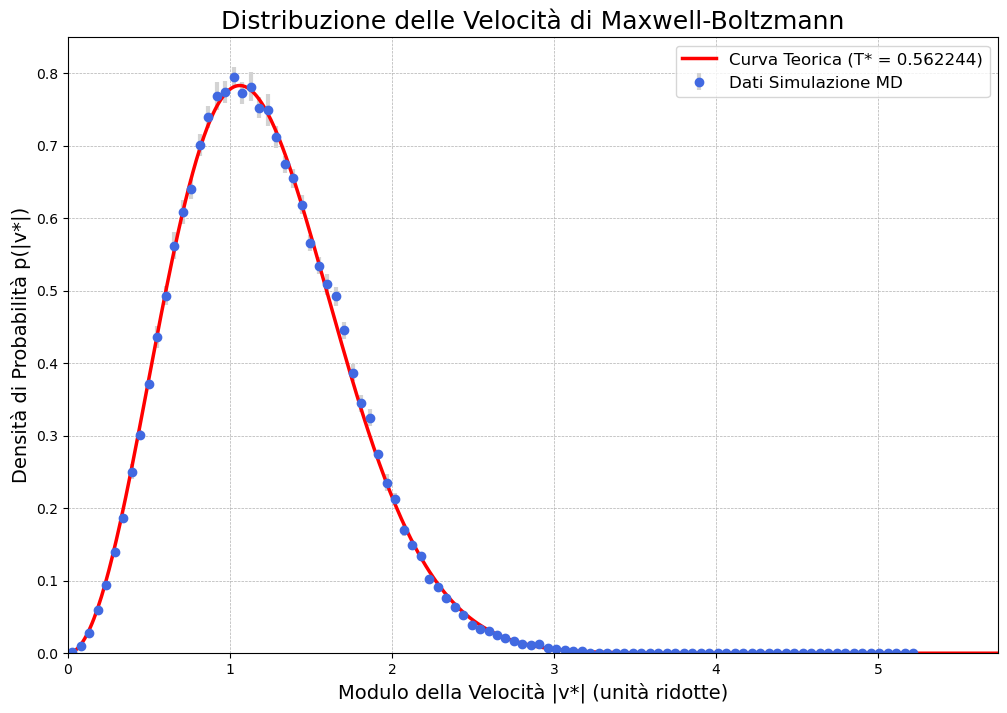

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parametri della simulazione in unità ridotte ---
# Valore corrispondente alla temperatura nel file input.dat
T_star = 0.562244 

# --- Funzione teorica di Maxwell-Boltzmann in unità ridotte (m=1, k_B=1) ---
def maxwell_boltzmann_reduced(v, T_star):
    """
    Calcola la distribuzione di M-B in unità ridotte (m=1, k_B=1).
    """
    return (1.0 / (2 * np.pi * T_star))**(1.5) * 4 * np.pi * v**2 * np.exp(-v**2 / (2 * T_star))

# --- Lettura e plotting dei dati ---
def plot_velocity_distribution(filename='pofv.dat'):
    """
    Legge i dati dal file di output e crea il grafico della distribuzione delle velocità.
    """
    try:
        v_bin_center, p_v, error = np.loadtxt(filename, unpack=True)
    except FileNotFoundError:
        print(f"Errore: File '{filename}' non trovato.")
        print("Assicurati che il file di output della simulazione si trovi nella stessa cartella di questo notebook.")
        return
        
    plt.figure(figsize=(12, 8))

    # 1. Grafico dei dati della simulazione con barre d'errore
    plt.errorbar(
        v_bin_center, 
        p_v, 
        yerr=error, 
        fmt='o', 
        color='royalblue', 
        label='Dati Simulazione MD', 
        ecolor='lightgray', 
        elinewidth=3, 
        capsize=0
    )

    # 2. Grafico della curva teorica
    v_theory = np.linspace(0, np.max(v_bin_center) * 1.1, 500)
    p_theory = maxwell_boltzmann_reduced(v_theory, T_star)
    plt.plot(v_theory, p_theory, color='red', linewidth=2.5, label=f'Curva Teorica (T* = {T_star})')

    # --- Parametri extra del grafico ---
    plt.title('Distribuzione delle Velocità di Maxwell-Boltzmann', fontsize=18)
    plt.xlabel('Modulo della Velocità |v*| (unità ridotte)', fontsize=14)
    plt.ylabel('Densità di Probabilità p(|v*|)', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.xlim(0, np.max(v_bin_center) * 1.1)
    plt.ylim(bottom=0)

    # Mostra il grafico direttamente nel notebook
    plt.show()

# --- Esecuzione ---
# Chiama la funzione per creare il grafico.
plot_velocity_distribution('pofv.dat')

### Analisi dei risultati

Il grafico illustra il confronto tra la distribuzione delle velocità delle particelle, ottenuta dalla simulazione di Dinamica Molecolare (MD), e la curva teorica di Maxwell-Boltzmann.

I punti blu rappresentano i valori medi della densità di probabilità per ciascun bin di velocità, calcolati al termine della simulazione. Le barre d'errore, indicano l'incertezza statistica associata a ciascuna media, ottenuta tramite il metodo del data blocking.

La curva rossa continua rappresenta la distribuzione teorica di Maxwell-Boltzmann per un gas ideale in unità ridotte, calcolata utilizzando la temperatura di equilibrio effettiva ($T^*_{eff} = 0.562244$) che il sistema ha raggiunto durante la fase di equilibrazione della simulazione.

Si osserva un ottimo accordo quantitativo tra i dati della simulazione e la previsione teorica. I punti sperimentali si sovrappongono quasi perfettamente alla curva analitica, e le ridotte dimensioni delle barre d'errore confermano la convergenza statistica e la precisione della misura. Questa corrispondenza valida l'accuratezza della simulazione MD e conferma che il sistema, una volta raggiunto l'equilibrio termodinamico, si comporta come previsto dalla meccanica statistica.

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> ( e.g. Argon parameters: $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
- gas phase: $\rho^\star = 0.05$, $T^\star \sim  2.0$ (cut-off radius: $r_c = 5.0$)

starting from a <span style="color:red">**very low entropic** initial configuration</span>:
1. initial **particle positions**: <span style="color:red">fcc crystal occupying half of the simulation box in each dimension</span>
2. initial **velocity distribution**: <span style="color:red">$p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$</span> where $v_{T^*}$ is suitably connected to $T^*$. For example, this condition could be obtained by imposing that every particle has an initial velocity $\pm v_{T^*}$ for **only one** of its velocity components: $v_x$, $v_y$, $v_z$.

The goal is to show that, by evolving such initial condition via a Molecular Dynamics simulation, the velocity distribution tends to approximate the Maxwell–Boltzmann distribution.

- **Produce some pictures that show this convergence**
- The evolution of the system moves towards the increasing of entropy (more homeogeneous configuration of particles)? What would you find by changing the direction of time? Comment on these aspects in your jupyter-notebook

**Note that** the MD simulation will conserve the total energy; thus the kinetic energy and the temperature are not constant of motion ... the comparison should be done with $p(v^*,T^*_{\rm eff})$ where $T^*_{\rm eff}$ is the effective temperature obtained once the system has been equilibrated.

### Commenti sull'implementazione

Per preparare la simulazione richiesta dall'esercizio 4.2, il codice C++ è stato modificato in modo modulare per generare una configurazione iniziale a bassissima entropia. Le modifiche sono state implementate per essere flessibili e attivabili tramite parametri nel file di input.

#### Generazione del reticolo FCC

Per creare lo stato posizionale ordinato, la classe `System` è stata estesa. È stata introdotta una nuova parola chiave, **`SETUP`**, nel file di input per controllare il tipo di configurazione iniziale. Questo permette di scegliere tra il caricamento di una configurazione preesistente (comportamento standard) o la generazione di un reticolo cristallino **FCC (Face-Centered Cubic)**.

#### Inizializzazione della distribuzione di velocità

La funzione `initialize_velocities()` è stata modificata per sostituire la distribuzione Maxwelliana con una distribuzione a **delta di Dirac**. A tutte le particelle è stato assegnato un modulo di velocità identico, calcolato in base alla temperatura iniziale.

Tale velocità è stata orientata lungo un unico asse cartesiano, con direzione positiva o negativa scelta casualmente per ciascuna particella. Infine, è stata applicata una correzione per **azzerare l'impulso totale** del sistema, garantendo la stabilità della simulazione.

Queste modifiche hanno permesso di preparare in modo accurato lo stato iniziale ordinato, sia nelle posizioni che nelle velocità, come richiesto dall'esercizio.

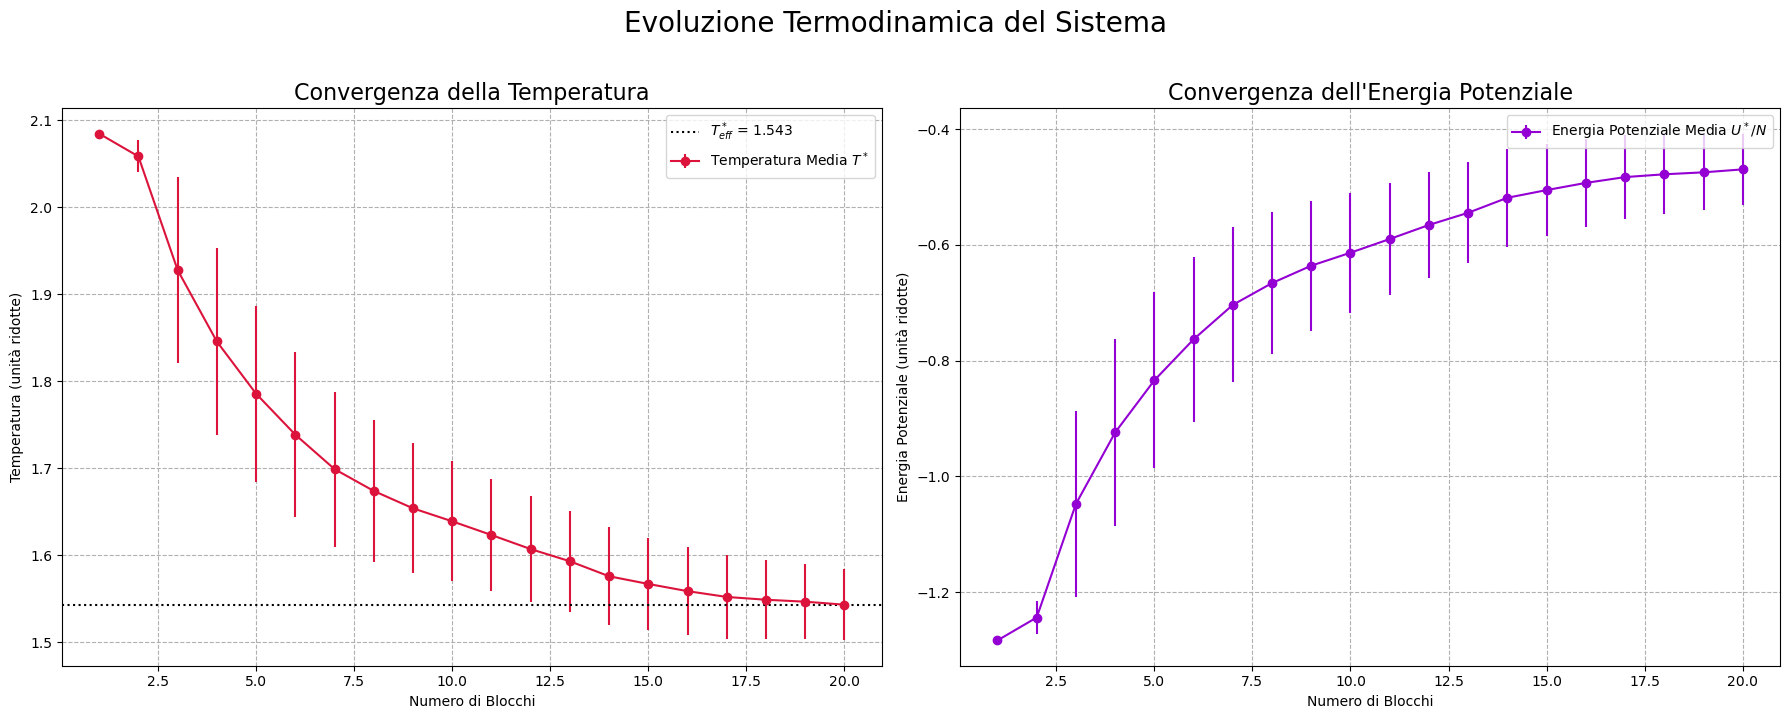

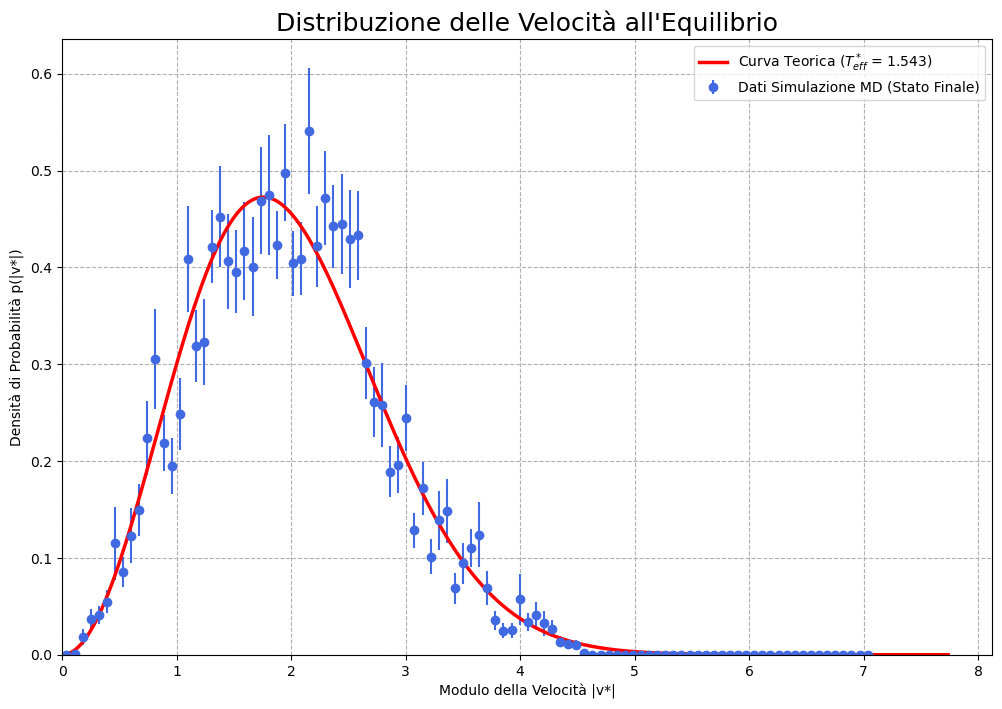

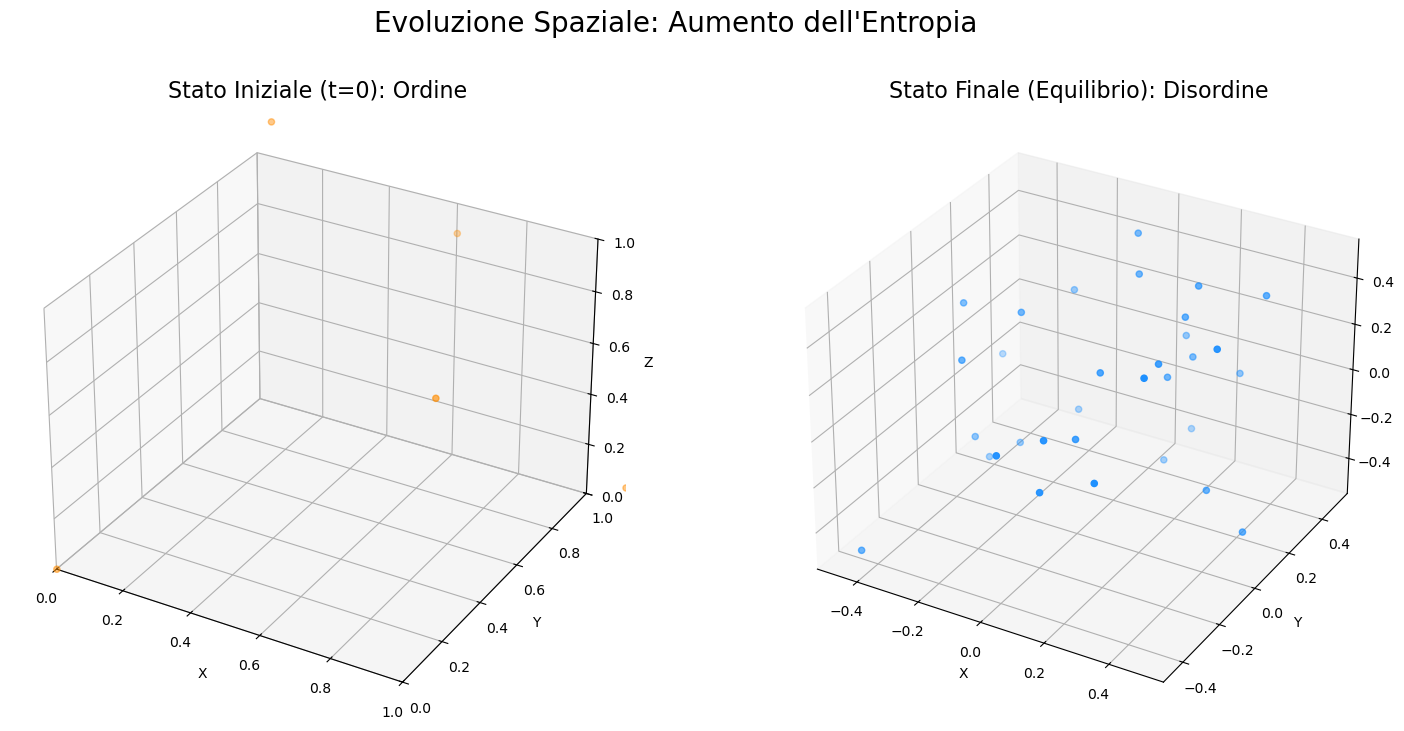

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Per i plot 3D
import os # Importa il modulo 'os' per gestire i percorsi dei file

#==============================================================================
#                             CONFIGURAZIONE
#==============================================================================
# Imposta il nome della sotto-cartella contenente i dati.
data_folder = 'data_2'


#==============================================================================
#                             FUNZIONI DI ANALISI
#==============================================================================

def plot_thermodynamics(folder):
    """
    Analizza e plotta l'evoluzione delle grandezze termodinamiche.
    """
    temp_file = os.path.join(folder, 'temperature.dat')
    pot_file = os.path.join(folder, 'potential_energy.dat')
    
    try:
        block_t, _, temp_avg, temp_err = np.loadtxt(temp_file, unpack=True)
        block_p, _, pot_avg, pot_err = np.loadtxt(pot_file, unpack=True)
    except FileNotFoundError as e:
        print(f"Errore: File non trovato -> {e.filename}")
        print(f"Assicurati che la cartella '{folder}' esista e contenga i file di dati.")
        return None

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle('Evoluzione Termodinamica del Sistema', fontsize=20, y=1.02)

    # Grafico Temperatura
    ax1.errorbar(block_t, temp_avg, yerr=temp_err, fmt='-o', color='crimson', label='Temperatura Media $T^*$')
    ax1.set_title('Convergenza della Temperatura', fontsize=16)
    ax1.set_xlabel('Numero di Blocchi'); ax1.set_ylabel('Temperatura (unità ridotte)')
    ax1.grid(True, linestyle='--')
    final_temp = temp_avg[-1]
    ax1.axhline(y=final_temp, color='black', linestyle=':', label=f'$T^*_{{eff}}$ = {final_temp:.3f}')
    ax1.legend()

    # Grafico Energia Potenziale
    ax2.errorbar(block_p, pot_avg, yerr=pot_err, fmt='-o', color='darkviolet', label='Energia Potenziale Media $U^*/N$')
    ax2.set_title('Convergenza dell\'Energia Potenziale', fontsize=16)
    ax2.set_xlabel('Numero di Blocchi'); ax2.set_ylabel('Energia Potenziale (unità ridotte)')
    ax2.grid(True, linestyle='--')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return final_temp


def plot_velocity_distribution(T_eff, folder):
    """
    Analizza la distribuzione finale delle velocità.
    """
    if T_eff is None: return
    
    pofv_file = os.path.join(folder, 'pofv.dat')
    try:
        v, p_v, err = np.loadtxt(pofv_file, unpack=True)
    except FileNotFoundError as e:
        print(f"Errore: File non trovato -> {e.filename}")
        return

    def maxwell_boltzmann_reduced(v, T_star):
        return (1.0 / (2 * np.pi * T_star))**(1.5) * 4 * np.pi * v**2 * np.exp(-v**2 / (2 * T_star))

    plt.figure(figsize=(12, 8))
    plt.errorbar(v, p_v, yerr=err, fmt='o', color='royalblue', label='Dati Simulazione MD (Stato Finale)')
    v_theory = np.linspace(0, np.max(v) * 1.1, 500)
    p_theory = maxwell_boltzmann_reduced(v_theory, T_eff)
    plt.plot(v_theory, p_theory, color='red', linewidth=2.5, label=f'Curva Teorica ($T^*_{{eff}}$ = {T_eff:.3f})')
    plt.title('Distribuzione delle Velocità all\'Equilibrio', fontsize=18)
    plt.xlabel('Modulo della Velocità |v*|'); plt.ylabel('Densità di Probabilità p(|v*|)')
    plt.grid(True, linestyle='--'); plt.legend()
    plt.xlim(0); plt.ylim(bottom=0)
    plt.show()


def plot_positions(folder):
    """
    Visualizza le posizioni delle particelle per mostrare l'aumento di entropia.
    """
    initial_config = os.path.join(folder, 'config_1.xyz')
    final_config = os.path.join(folder, 'config.xyz')
    
    try:
        # CORREZIONE: Aggiungiamo usecols=(1, 2, 3) per leggere solo le colonne X, Y, Z
        x_init, y_init, z_init = np.loadtxt(initial_config, skiprows=2, usecols=(1, 2, 3), unpack=True)
        x_final, y_final, z_final = np.loadtxt(final_config, skiprows=2, usecols=(1, 2, 3), unpack=True)
        
    except FileNotFoundError as e:
        print(f"Errore: File non trovato -> {e.filename}")
        return

    fig = plt.figure(figsize=(18, 8))
    fig.suptitle('Evoluzione Spaziale: Aumento dell\'Entropia', fontsize=20, y=1.0)
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x_init, y_init, z_init, c='darkorange')
    ax1.set_title('Stato Iniziale (t=0): Ordine', fontsize=16)
    ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
    ax1.set_xlim(0, 1); ax1.set_ylim(0, 1); ax1.set_zlim(0, 1)

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x_final, y_final, z_final, c='dodgerblue')
    ax2.set_title('Stato Finale (Equilibrio): Disordine', fontsize=16)
    ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')

    plt.show()

#==============================================================================
#                     ESECUZIONE DELL'ANALISI COMPLETA
#==============================================================================

# 1. Analisi Termodinamica
T_eff = plot_thermodynamics(data_folder)

# 2. Analisi della Distribuzione delle Velocità
plot_velocity_distribution(T_eff, data_folder)

# 3. Analisi della Configurazione Spaziale
plot_positions(data_folder)

### Analisi dei risultati

In questo esercizio è stato simulato il comportamento di un sistema di Lennard-Jones partendo da una configurazione a **bassissima entropia** per osservarne la spontanea evoluzione verso l'equilibrio termodinamico, come previsto dalla seconda legge della termodinamica.

#### Evoluzione ed equilibrazione

I grafici dell'energia potenziale media e della temperatura in funzione dei blocchi di simulazione mostrano chiaramente il processo di **equilibrazione**. Partendo da uno stato iniziale ordinato (un reticolo FCC) e con una distribuzione di velocità deltiforme, il sistema subisce una rapida variazione delle sue proprietà macroscopiche. L'energia potenziale **aumenta** man mano che il cristallo si disgrega e le particelle si espandono. Per il principio di conservazione dell'energia totale, a questo aumento deve corrispondere una diminuzione dell'energia cinetica, e quindi la **temperatura diminuisce** fino a stabilizzarsi attorno a un valore medio stabile, identificato come la temperatura effettiva di equilibrio del sistema, $T^*_{eff}$.

#### Convergenza alla distribuzione di Maxwell-Boltzmann

Il grafico centrale confronta la distribuzione delle velocità delle particelle, misurata alla fine della simulazione, con la curva teorica di Maxwell-Boltzmann calcolata proprio alla temperatura di equilibrio $T^*_{eff}$. L'**accordo** tra i dati sperimentali (punti) e la curva teorica (linea continua) dimostra che, nonostante lo stato di partenza ideale, il sistema è evoluto in modo che le velocità delle sue particelle convergessero alla più probabile distribuzione statistica.

#### Aumento dell'entropia

La visualizzazione delle configurazioni spaziali dimostra platealmente l'**aumento di entropia**. Lo stato iniziale, in cui le particelle sono confinate in un cristallo ordinato che occupa solo una frazione del volume, è uno stato a bassissima entropia. Durante l'evoluzione temporale, le particelle si espandono spontaneamente fino a riempire tutto il volume a disposizione in modo omogeneo e disordinato, massimizzando quindi l'entropia del sistema.

Questo processo **unidirezionale** (dall'ordine al disordine) è una manifestazione della "freccia del tempo" termodinamica. Sebbene le equazioni del moto microscopiche siano reversibili nel tempo, il comportamento macroscopico di un sistema a molte particelle è intrinsecamente irreversibile e procede sempre nella direzione dell'aumento dell'entropia.

### Exercise 04.3

Starting from the final state of an **equilibrated** MD simulation of the system in Exercise 04.2, by changing the direction of time (e.g. by inverting the final velocities, i.e. ... ), try to return back to the very low entropic initial configuration of Exercise 04.2. Is this possible? (for example, one can monitor the behavior of the average **potential energy** and the average **temperature** in **each block** as a function of time going **in both directions**. Show some picture and comment on what you find in your jupyter-notebook.

### Commenti sull'implementazione

Per studiare la reversibilità temporale, il codice C++ è stato modificato per eseguire una simulazione "all'indietro", partendo dallo stato finale di una simulazione precedente. L'inversione delle velocità iniziali è stata ottenuta scambiando il ruolo dei file di configurazione finale (`config.xyz`) e penultimo (`conf-1.xyz`).

* **Aggiunta di una flag**: È stato introdotta una **flag booleano `_reverse_time`** nel file `system.h` e la sua lettura nel file `input.dat` per attivare o disattivare la modalità di simulazione inversa.

* **Logica di caricamento invertita**: Quando la flag di inversione è attiva, la logica di caricamento delle configurazioni viene **invertita**: le posizioni *attuali* sono lette dal file delle posizioni penultime (`conf-1.xyz`), mentre le posizioni *vecchie* sono lette dal file delle posizioni finali (`config.xyz`). Questo scambio inverte di fatto il primo passo di integrazione dell'algoritmo di Verlet, avviando l'evoluzione all'indietro nel tempo.

* **Controllo su `_restart`**: È stato aggiunto un controllo **`if (!_restart)`** in `initialize_velocities()` per assicurare che il calcolo delle posizioni "vecchie" a partire dalle velocità avvenga solo quando la simulazione parte da zero, evitando di sovrascrivere le configurazioni lette dai file durante un riavvio.

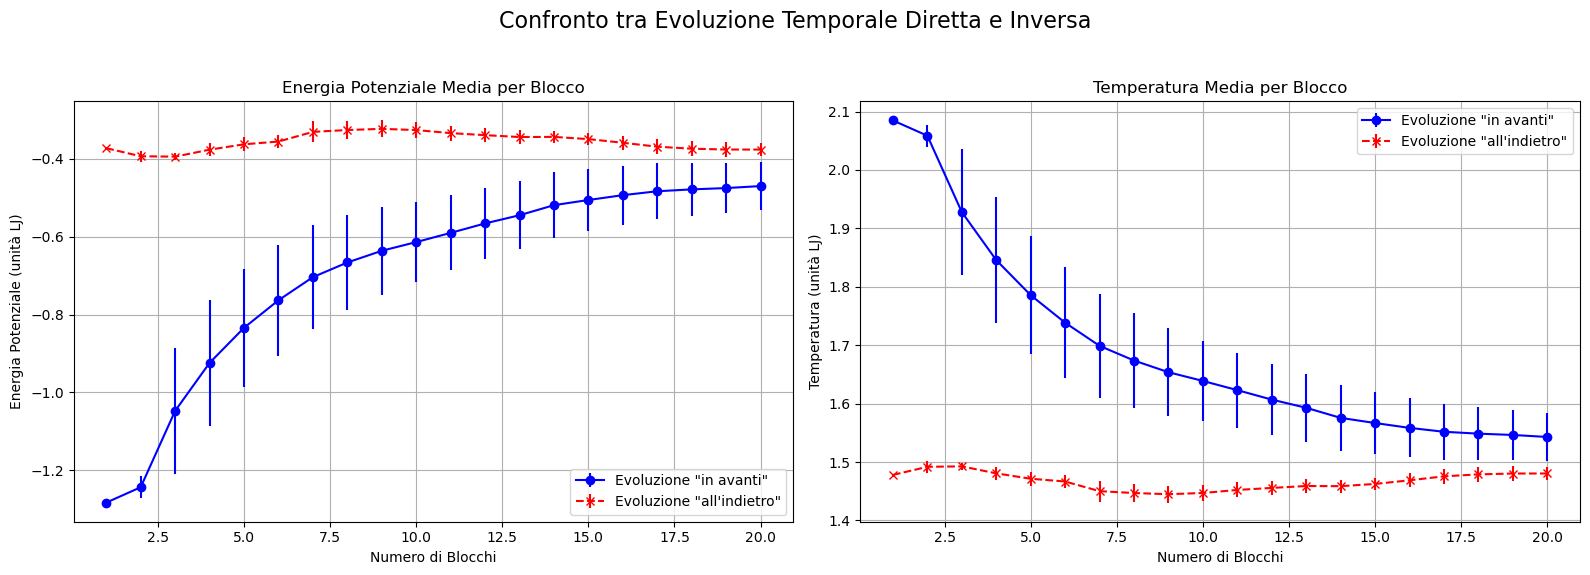

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Caricamento Dati ---

# 1. Dati dalla simulazione originale "in avanti"
fwd_pot_energy_path = 'data_2/potential_energy.dat'
fwd_temp_path = 'data_2/temperature.dat'

# 2. Dati dalla nuova simulazione "all'indietro"
bwd_pot_energy_path = 'data_3/potential_energy.dat'
bwd_temp_path = 'data_3/temperature.dat'

# Carica i dati usando numpy, saltando la riga di intestazione
# Colonne lette: 0=Blocco, 2=Media progressiva, 3=Errore progressivo
blocks_fwd, pe_fwd, pe_err_fwd = np.loadtxt(fwd_pot_energy_path, usecols=(0, 2, 3), unpack=True)
blocks_fwd, temp_fwd, temp_err_fwd = np.loadtxt(fwd_temp_path, usecols=(0, 2, 3), unpack=True)

blocks_bwd, pe_bwd, pe_err_bwd = np.loadtxt(bwd_pot_energy_path, usecols=(0, 2, 3), unpack=True)
blocks_bwd, temp_bwd, temp_err_bwd = np.loadtxt(bwd_temp_path, usecols=(0, 2, 3), unpack=True)


# --- Creazione Grafici ---

# Creiamo una figura con due subplot (grafici affiancati)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Energia Potenziale
ax1.errorbar(blocks_fwd, pe_fwd, yerr=pe_err_fwd, label='Evoluzione "in avanti"', color='blue', marker='o', linestyle='-')
ax1.errorbar(blocks_bwd, pe_bwd, yerr=pe_err_bwd, label='Evoluzione "all\'indietro"', color='red', marker='x', linestyle='--')
ax1.set_title('Energia Potenziale Media per Blocco')
ax1.set_xlabel('Numero di Blocchi')
ax1.set_ylabel('Energia Potenziale (unità LJ)')
ax1.legend()
ax1.grid(True) # Aggiunge una griglia per leggibilità

# Grafico 2: Temperatura
ax2.errorbar(blocks_fwd, temp_fwd, yerr=temp_err_fwd, label='Evoluzione "in avanti"', color='blue', marker='o', linestyle='-')
ax2.errorbar(blocks_bwd, temp_bwd, yerr=temp_err_bwd, label='Evoluzione "all\'indietro"', color='red', marker='x', linestyle='--')
ax2.set_title('Temperatura Media per Blocco')
ax2.set_xlabel('Numero di Blocchi')
ax2.set_ylabel('Temperatura (unità LJ)')
ax2.legend()
ax2.grid(True) # Aggiunge una griglia per leggibilità

# Titolo generale per l'intera figura
plt.suptitle('Confronto tra Evoluzione Temporale Diretta e Inversa', fontsize=16)

# Ottimizza la spaziatura per evitare che i titoli si sovrappongano
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Analisi dei risultati

I grafici confrontano l'evoluzione delle proprietà termodinamiche (energia potenziale e temperatura) del sistema durante la simulazione originale ("in avanti") e quella con le velocità invertite ("all'indietro").

#### Evoluzione "in avanti" (curva blu)

Questa curva mostra il processo di equilibrazione a partire dallo stato iniziale a bassa entropia.
* L'**energia potenziale** parte da un valore molto basso (stato cristallino ordinato) e aumenta fino a raggiungere un plateau a un valore più alto, tipico di una fase gassosa disordinata.
* La **temperatura**, per conservazione dell'energia totale, mostra un comportamento opposto: parte da un valore alto e poi diminuisce fino a stabilizzarsi a un valore di equilibrio inferiore.

#### Evoluzione "all'indietro" (curva rossa)

La simulazione con le velocità invertite, che parte dallo stato di equilibrio finale della prima, **non ripercorre la traiettoria originale**. Sia l'energia potenziale che la temperatura partono dai rispettivi valori di equilibrio e continuano a fluttuare attorno a essi, senza mostrare alcuna tendenza a ritornare ai valori dello stato iniziale ordinato.

#### Commento sulla (ir)reversibilità

Questo risultato è una chiara dimostrazione dell'**irreversibilità macroscopica** e della **freccia del tempo termodinamica**.

Sebbene le leggi della meccanica classica siano teoricamente reversibili, la natura caotica delle interazioni in un sistema a molte particelle amplifica qualsiasi minima imprecisione numerica. Di conseguenza, è impossibile per il sistema ripercorrere la sua esatta traiettoria verso uno stato a bassa entropia, che è un singolo stato ordinato. Invece, il sistema continua a esplorare l'enorme numero di microstati disordinati accessibili a quella energia, rimanendo di fatto nello stato di massima entropia.

La simulazione, quindi, conferma che il ritorno spontaneo da uno stato di disordine a uno di ordine non avviene, confermando numericamente il secondo principio della termodinamica.